In [ ]:
#Importing Libraries
 
from __future__ import print_function
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D,MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

import keras
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# Setting the Random Seed
random.seed(10)

In [ ]:
from keras.datasets import cifar10
#import dataset
(X_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


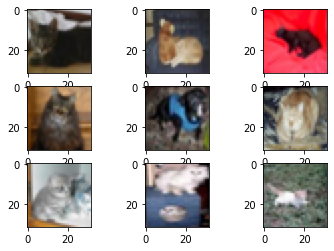

In [ ]:
#Input image dimensions
img_rows, img_cols = 32, 32
num_classes = 2
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# EXTRACTING CATS(LABEL=3) and DOGS(LABEL=5) IMAGES
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))
y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)
x_train = x_train[train_picks]
x_test = x_test[test_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
#Show the plot
plt.show()

In [ ]:
X_train = np.concatenate((X_train,x_test))
Y_train = np.concatenate((y_train, y_test))

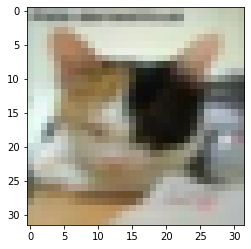

In [ ]:
#Image of Cat
plt.imshow(x_train[6000], cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
 # DEV AND TEST SET
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123045")# Cats synset
print(ie_page.content)
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02084071")# Dogs synset
print(ae_page.content)
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

ie_str_soup=str(ie_soup)#convert soup to string so it can be split
type(ie_str_soup)
ie_split_urls=ie_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(ie_split_urls))#print the length of the list so you know how many urls you have

ae_str_soup=str(ae_soup)#convert soup to string so it can be split
type(ae_str_soup)
ae_split_urls=ae_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(ae_split_urls))  #print the length of the list so you know how many urls you have


b"http://farm1.static.flickr.com/55/181882736_0b23280b07.jpg\r\nhttp://static.flickr.com/150/361597623_caf7b9c171.jpg\r\nhttp://farm1.static.flickr.com/85/234264322_994b793b69.jpg\r\nhttp://z.about.com/d/cats/1/7/4/0/1/kolohe640x480.jpg\r\nhttp://farm1.static.flickr.com/36/78927720_f45b3c9f6c.jpg\r\nhttp://farm1.static.flickr.com/200/460416306_4294799bf9.jpg\r\nhttp://www.shimmerclaw-cats.co.uk/images/Megabytefr.eSized.jpg\r\nhttp://farm1.static.flickr.com/241/517131023_f3511abd83.jpg\r\nhttp://farm3.static.flickr.com/2231/2234644411_d61dd2c059.jpg\r\nhttp://farm3.static.flickr.com/2224/2185697258_de6724cb56.jpg\r\nhttp://farm1.static.flickr.com/93/271991917_189e8e1c2e.jpg\r\nhttp://farm1.static.flickr.com/21/28185123_bae9bb6590.jpg\r\nhttp://farm3.static.flickr.com/2258/1702122823_056cfb8922.jpg\r\nhttp://farm1.static.flickr.com/70/153100540_c8b80e86f0.jpg\r\nhttp://farm1.static.flickr.com/62/164351244_5c26d331a0.jpg\r\nhttp://farm1.static.flickr.com/224/460434317_814a1b86cb.jpg\r\nht

In [ ]:
!mkdir '/content/catdog_dev/' 
!mkdir '/content/catdog_test/'

In [ ]:
#Defining function to convert URL to images 
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image


In [ ]:
n_of_training_images=50   #The number of Development images to use
counter=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/ie.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)
      except:
        None
print("\n ALL THE DEV SET CATS- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

counter=0
for progress in range(10*n_of_training_images):#store all 200 AFRICAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break 
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/ae.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)

      except:
        None
print("\n ALL THE DEV SET -DOGS IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)


0
Counter count : 1
Counter count : 2
Counter count : 3
Counter count : 4
Counter count : 5
Counter count : 6
10
Counter count : 7
Counter count : 8
Counter count : 9
Counter count : 10
Counter count : 11
Counter count : 12
Counter count : 13
20
Counter count : 14
Counter count : 15
Counter count : 16
Counter count : 17
Counter count : 18
Counter count : 19
Counter count : 20
Counter count : 21
30
Counter count : 22
Counter count : 23
Counter count : 24
Counter count : 25
Counter count : 26
40
Counter count : 27
Counter count : 28
Counter count : 29
Counter count : 30
Counter count : 31
50
Counter count : 32
Counter count : 33
Counter count : 34
Counter count : 35
Counter count : 36
Counter count : 37
60
Counter count : 38
Counter count : 39
Counter count : 40
Counter count : 41
Counter count : 42
Counter count : 43
Counter count : 44
70
Counter count : 45
Counter count : 46
Counter count : 47
Counter count : 48
Counter count : 49
Counter count : 50

 ALL THE DEV SET CATS- IMAGES STORE

In [ ]:
#Storing Test Data data:
n_of_testing_images=50
counter=0
for progress in range(10*n_of_testing_images):#store all the 50INDIAN ELEPHANT TEST IMAGES on a directory
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_test/ie.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE CAT TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

counter=0
for progress in range(10*n_of_testing_images):#store all 50 AFRICAN ELEPEHANT TEST IMAGES on a driectory
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_test/ae.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE DOGS TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)


0
Counter count:  1
Counter count:  2
Counter count:  3
Counter count:  4
Counter count:  5
Counter count:  6
10
Counter count:  7
Counter count:  8
Counter count:  9
Counter count:  10
Counter count:  11
Counter count:  12
Counter count:  13
20
Counter count:  14
Counter count:  15
Counter count:  16
Counter count:  17
Counter count:  18
Counter count:  19
Counter count:  20
30
Counter count:  21
Counter count:  22
Counter count:  23
Counter count:  24
Counter count:  25
Counter count:  26
Counter count:  27
40
Counter count:  28
Counter count:  29
Counter count:  30
Counter count:  31
Counter count:  32
Counter count:  33
Counter count:  34
Counter count:  35
Counter count:  36
50
Counter count:  37
Counter count:  38
Counter count:  39
Counter count:  40
Counter count:  41
Counter count:  42
Counter count:  43
60
Counter count:  44
Counter count:  45
Counter count:  46
Counter count:  47
Counter count:  48
Counter count:  49
Counter count:  50

 ALL THE CAT TEST IMAGES STORED ON THE

In [ ]:
# Path to the train folder
import os
original_train = '/content/catdog_dev/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append('0')
  else:
    categories.append('1')


#Create dataframe for Development

import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})
data.to_csv("original_catdog_dev.csv",index=False)


In [ ]:
data

,filename,label
0,ie.70.jpg,0
1,ie.55.jpg,0
2,ie.36.jpg,0
3,ae.21.jpg,1
4,ie.47.jpg,0
...,...,...
95,ie.2.jpg,0
96,ie.43.jpg,0
97,ie.28.jpg,0
98,ae.62.jpg,1


In [ ]:
# Path to the test folder
import os
original_test = '/content/catdog_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append(0)
  else:
    categories.append(1)

data_test = pd.DataFrame({'filename':filenames,'label':categories})
data_test.to_csv("original_catdog_test.csv",index=False)

In [ ]:
# THE MODELING PART

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (7,7),padding = 'valid',activation ='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))


model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1, activation = "sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 512)         2

In [ ]:
# EarlyStopping, Callbacks and Model Compilation
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "weights-improvement-experiment3.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=2.0)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)
callbacks_list = [checkpoint, es,red_lr]
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

dev_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(32,32),
                                             class_mode='binary',
                                             #batch_size=10,
                                             #subset='validation',
                                             #shuffle=True,
                                             #seed=7,
                                            color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,
                                                directory="/content/catdog_test/",
                                                x_col="filename",
                                                y_col=None,
                                                #batch_size=10,
                                                #seed=7,
                                                #shuffle=False,
                                                class_mode=None,
                                                target_size=(32,32),
                                                color_mode='rgb')


Found 100 validated image filenames belonging to 2 classes.
Found 100 validated image filenames.


In [ ]:
# Fitting the Model
history=model.fit(datagen.flow(x_train, y_train),epochs=50,verbose=1,callbacks=callbacks_list,validation_data=dev_generator)

Epoch 1/50
313/313 [==============================] - 13s 19ms/step - loss: 0.7053 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to weights-improvement-experiment3.h5
Epoch 2/50
313/313 [==============================] - 6s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6875 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/50
313/313 [==============================] - 6s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/50
313/313 [==============================] - 6s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5100

Epoch 00004: val_accuracy improved from 0.50000 to 0.51000, saving model to weights-improvement-experiment3.h5
Epoch 5/50
313/313 [==============================] - 6s 18ms/step - loss: 0.6931 - accuracy: 

### Plotting Accuracy of Train VS Validation 

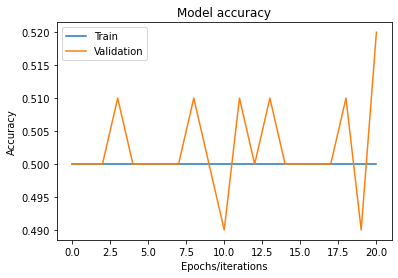

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()


### Plotting Loss of Train VS Validation 

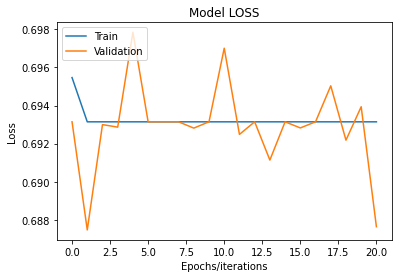

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()


### Predicting the Output 

In [ ]:
test_generator.reset()
predictions=np.argmax(model.predict_generator(test_generator),axis=-1)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})

results.to_csv("results_catsdogs_test.csv",index=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
preds=results['Predictions']

In [ ]:
preds=pd.get_dummies(preds)

In [ ]:
preds

,0
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,1
98,1


In [ ]:
preds.to_csv('preds.csv')

In [ ]:
data_test['label']

0     0
1     0
2     1
3     0
4     0
     ..
95    0
96    0
97    1
98    0
99    1
Name: label, Length: 100, dtype: int64

In [ ]:
from google.colab import files
files.download('preds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Error Analysis and Data Mismatch 

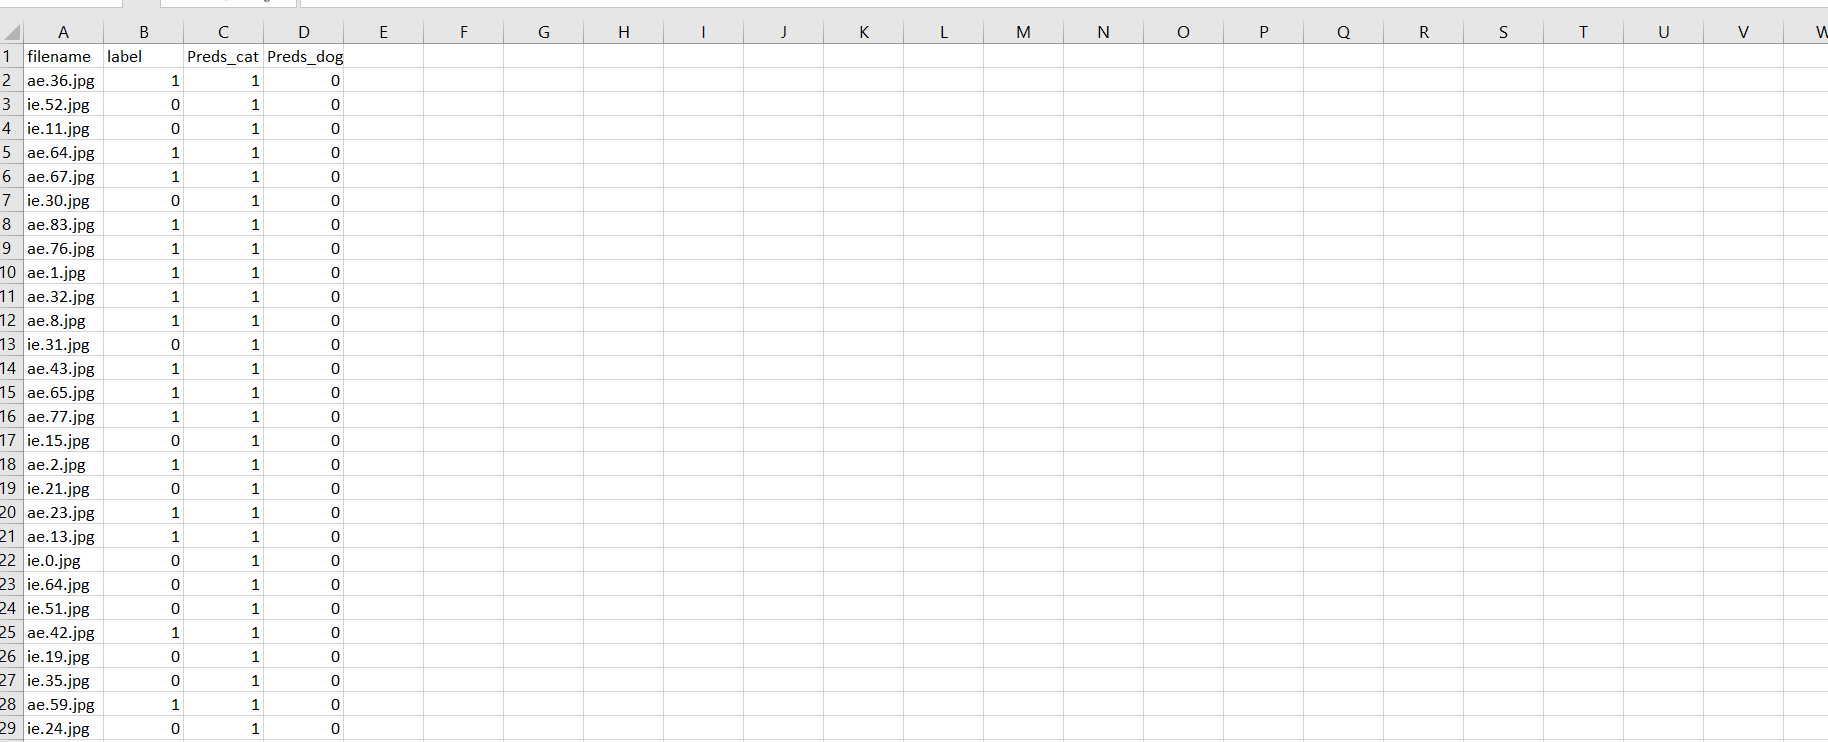

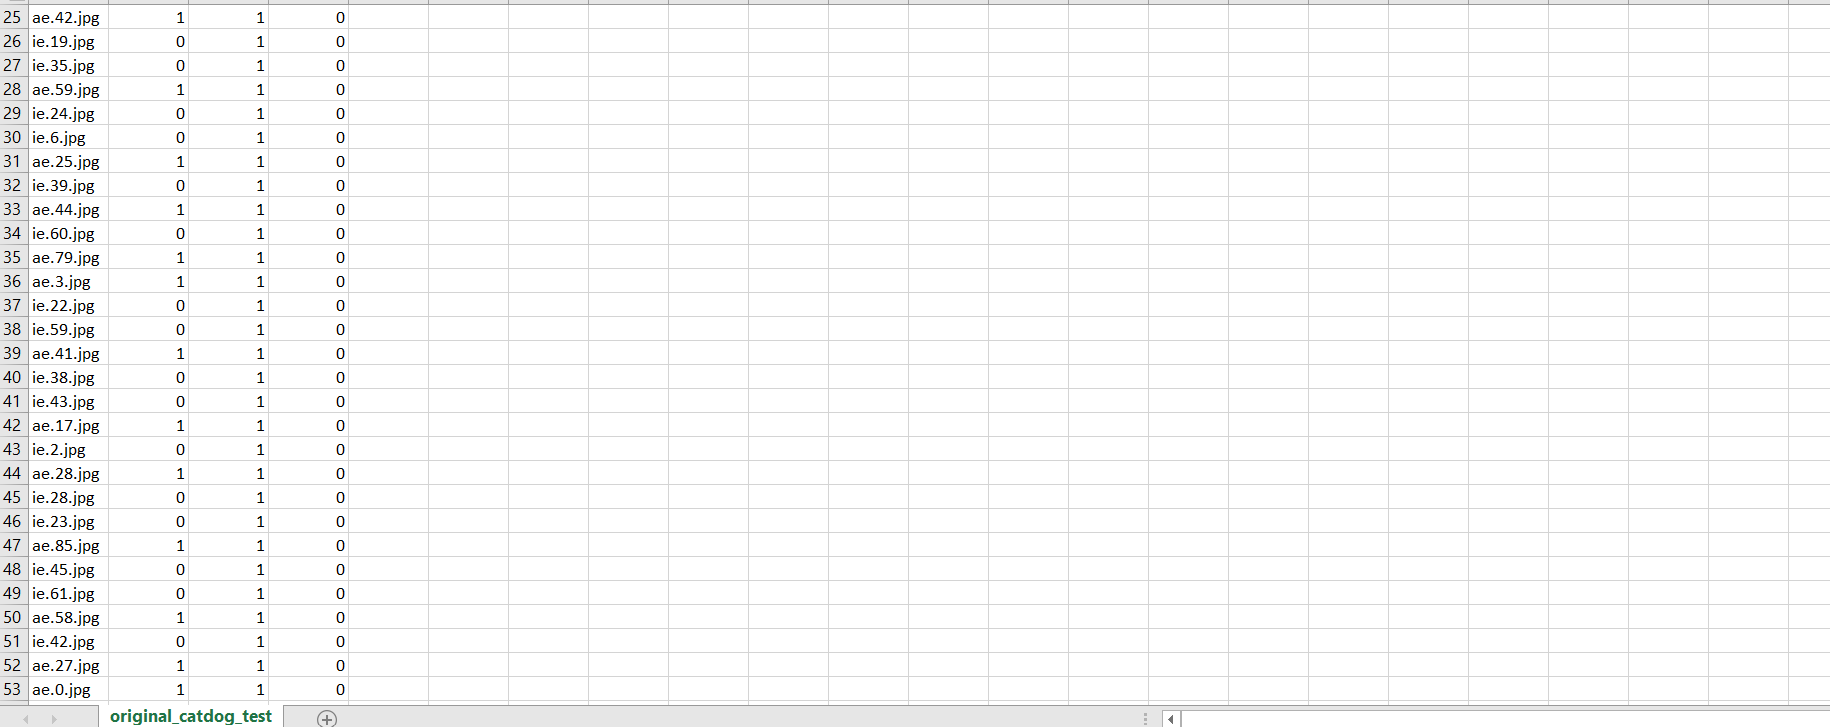

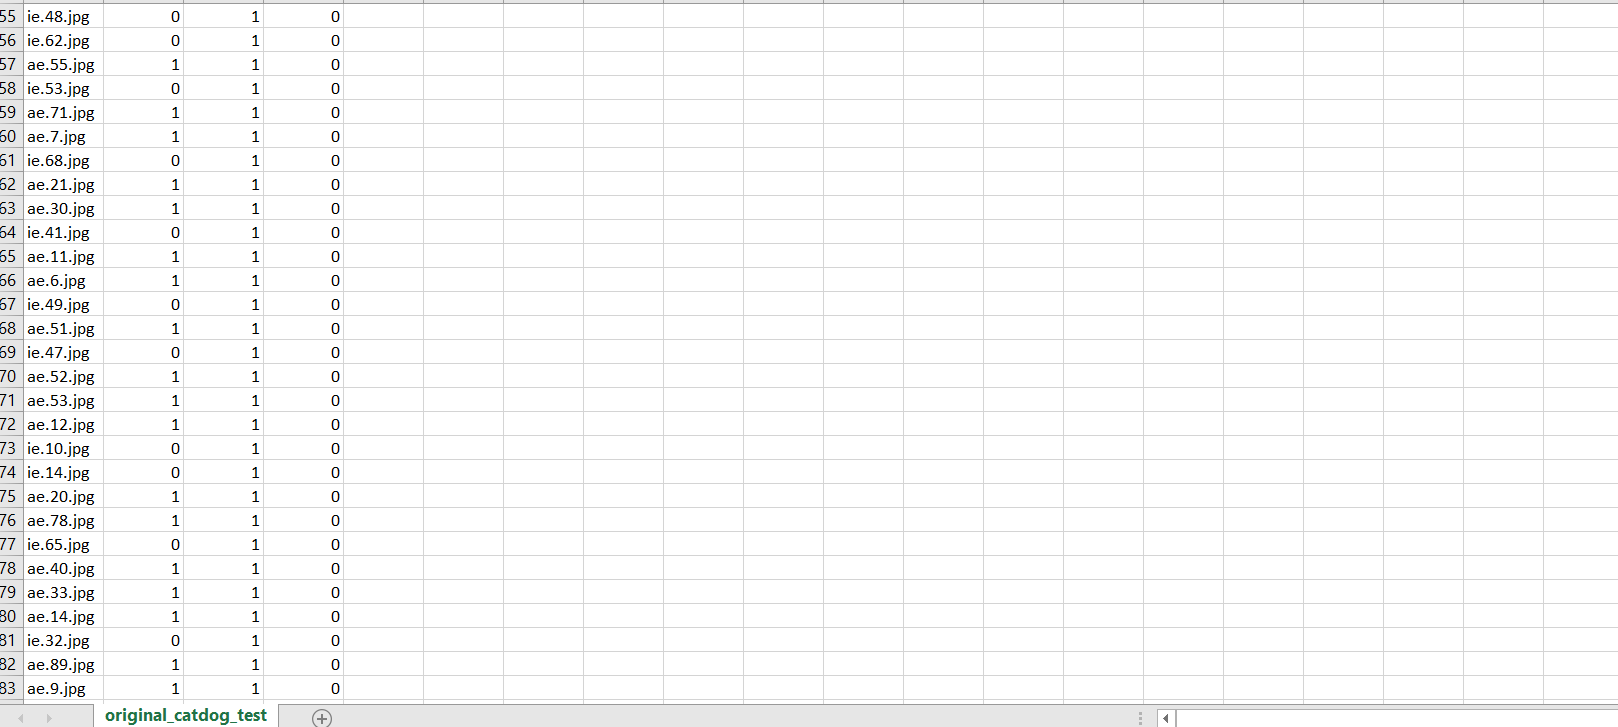

### Confusion Matrix 

Text(0.5, 1.0, 'Confusion_matrix')

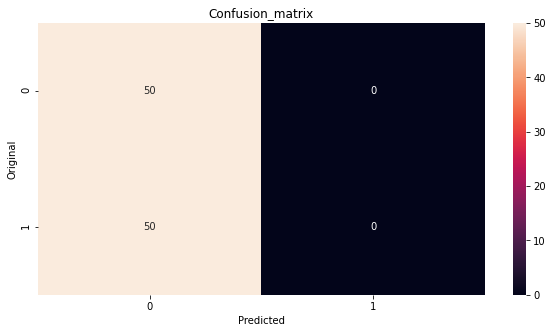

In [ ]:
plt.figure(figsize=(10,5))
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(np.asarray(data_test['label']), results['Predictions'])
ax = plt.subplot()

import seaborn as sns
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

In [ ]:
print(classification_report(np.asarray(data_test['label']), results["Predictions"]))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67        50
           1       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = accuracy_score(results['Predictions'],data_test["label"])
print('Test Accuracy:',score*100)

Test Accuracy: 50.0
